ML Hands-on as part of Python for Machine Learning and Data Science MasterClass 2021 (Jose Portilla)

# Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

Iris Flower dataset which contains information about sepal length and width, and petal length and width from 3 species Setosa, Virginica and Versicolor.


Detail explanation: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [5]:
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis (EDA)

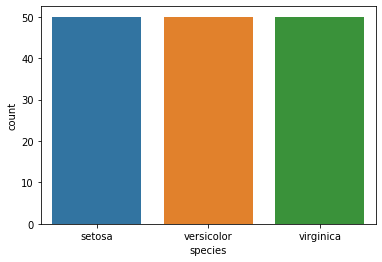

In [10]:
sns.countplot(df['species'])

Balanced number of observation from each class

### Distribution

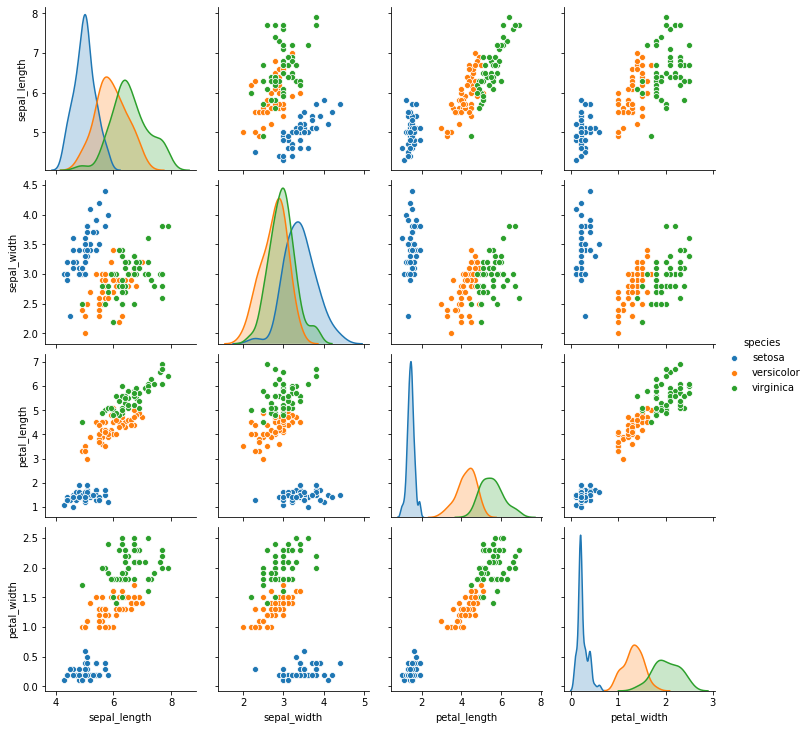

In [11]:
sns.pairplot(df, hue='species')

Interpretation

Setosa showed different range of values compared with Versicolor and Virginica which has closer values between each other especially for sepal length and sepal width.

Text(0.5, 0, 'Species')

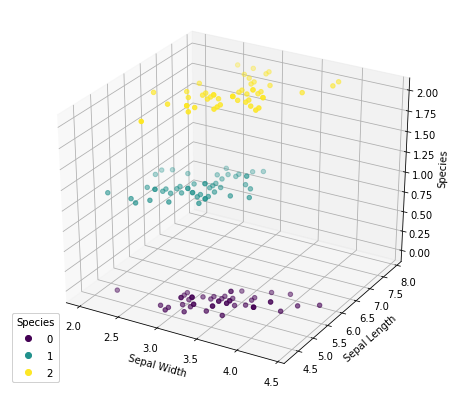

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[8,7])

ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

scatter = ax.scatter(df['sepal_width'], df['sepal_length'], colors, c=colors);

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Species")
ax.add_artist(legend1)

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Species')

Text(0.5, 0, 'Species')

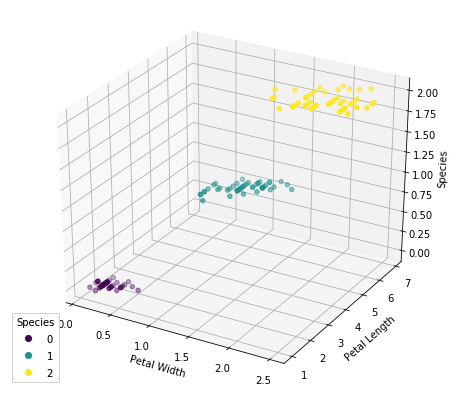

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[8,7])

ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

scatter = ax.scatter(df['petal_width'], df['petal_length'], colors, c=colors);

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Species")
ax.add_artist(legend1)

ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Species')

### Correlation

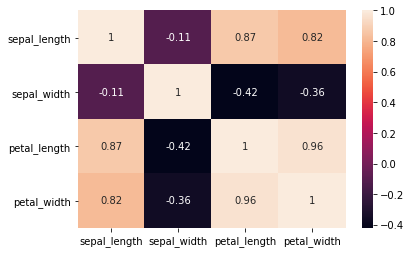

In [34]:
sns.heatmap(df.corr(), annot=True)

There are quite high correlation between 'Sepal Length and Petal Length', 'Sepal Length and Petal Width', and 'Petal Length and Petal Width'

# Logistics Regression

### Train | Test Split and Scaling

In [35]:
X = df.drop('species',axis=1)
y = df['species']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Model

In [45]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch for Best Hyper-Parameters

In [46]:
from sklearn.model_selection import GridSearchCV

In [52]:
# Define Hyper-Parameters Grid

penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace(0, 3, 10)

In [53]:
grid_model = GridSearchCV(log_model, param_grid={'C':C,'penalty':penalty})
grid_model.fit(scaled_X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", 

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [54]:
grid_model.best_params_

{'C': 4.641588833612778, 'penalty': 'l1'}

### Model Performance

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [58]:
y_pred = grid_model.predict(scaled_X_test)

In [59]:
# Accuracy Score

accuracy_score(y_test,y_pred)

0.9666666666666667

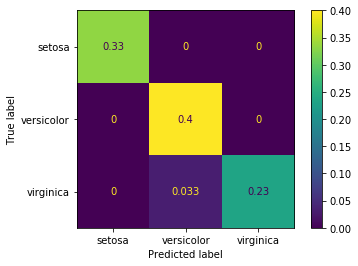

In [61]:
# Confusion Matrix

plot_confusion_matrix(grid_model,scaled_X_test,y_test, normalize='all')

In [62]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]])

In [63]:
# Classification Matrix Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### AUC Curves Evaluation

In [64]:
from sklearn.metrics import roc_curve, auc

In [77]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calculate dummies for y_test
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    
    # Calculate ROC_AUC
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # ROC for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC Curve (area = %0.2f) for label %i' % (roc_auc[i], i))

    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

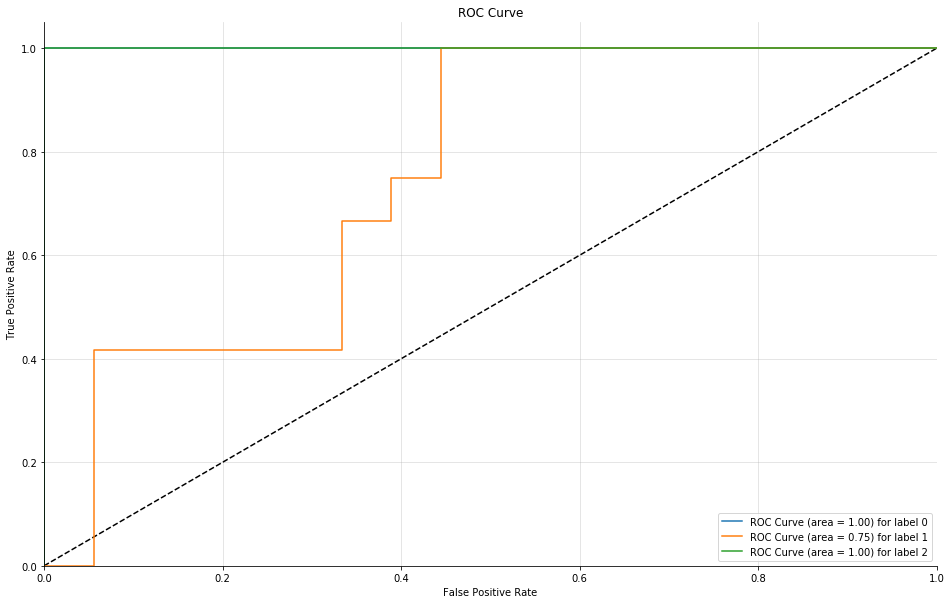

In [78]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [76]:
print("Precision Score : ", precision_score(y_test, y_pred, average='micro'))
print("Recall Score :" , recall_score(y_test, y_pred, average='micro'))
print("F1 Score :" , f1_score(y_test, y_pred, average='micro'))

Precision Score :  0.9666666666666667
Recall Score : 0.9666666666666667
F1 Score : 0.9666666666666667
